In [6]:
import pandas as pd
import numpy as np

In [39]:
df= pd.read_csv('data/data_IA_UP.csv')

In [40]:
df.head()

,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v289,v290,v291,v292,v293,v294,v295,v296,v297,v298
0,1,1,1,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1


### Descriptivo

In [42]:
num_rows = df.shape[0]
num_variables = df.drop('target', axis=1).shape[1]
class_balance = df['target'].value_counts(normalize=True) * 100
print(f"Número de filas: {num_rows}")
print(f"Número de variables (columnas que no son 'target'): {num_variables}")
print("Balance de clases para 'target' (en porcentaje):")
print(class_balance)

Número de filas: 24213
Número de variables (columnas que no son 'target'): 298
Balance de clases para 'target' (en porcentaje):
target
1    57.613679
0    42.386321
Name: proportion, dtype: float64


In [43]:
df['mean_positive'] = df.drop('target', axis=1).mean(axis=1)
df['mean_positive'].describe()

count    24213.000000
mean         0.091024
std          0.048197
min          0.000000
25%          0.053691
50%          0.083893
75%          0.117450
max          0.352349
Name: mean_positive, dtype: float64

In [44]:
df = df.drop(columns=['mean_positive'])

---------

### Regresión logística

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [45]:
pipeline = Pipeline([
    ('clf', LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=100))
])
## este pipeline solo tiene el la gresión logistica baseline, la idea es que si hay alguna otra transformación que se quiera hacer, se puede agregar al pipeline

In [46]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

#### Model train

In [47]:
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Cross val - AUC avg: {scores.mean()}")

Cross val - AUC avg: 0.6543957830786933


In [48]:
scores_df = pd.DataFrame(scores, columns=['AUC Score'])
scores_df['Fold'] = range(1, len(scores) + 1)
mean_score = scores.mean()
std_score = scores.std()
scores_df['Mean'] = mean_score
scores_df['Std'] = std_score
scores_df

,AUC Score,Fold,Mean,Std
0,0.657368,1,0.654396,0.006274
1,0.660091,2,0.654396,0.006274
2,0.659975,3,0.654396,0.006274
3,0.643887,4,0.654396,0.006274
4,0.650658,5,0.654396,0.006274


In [49]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('clf', LogisticRegression(C=1, solver='liblinear'))])

#### Model evaluation

In [36]:
from utils import *

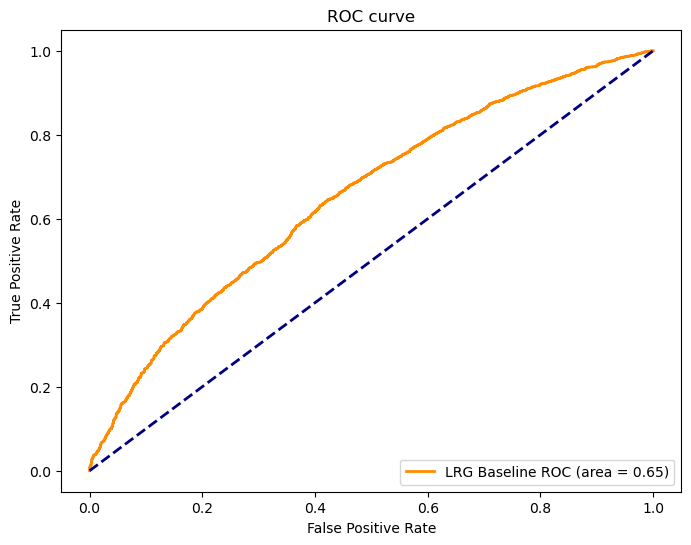

In [50]:
plot_roc_curve(pipeline, X_test, y_test, "LRG Baseline")

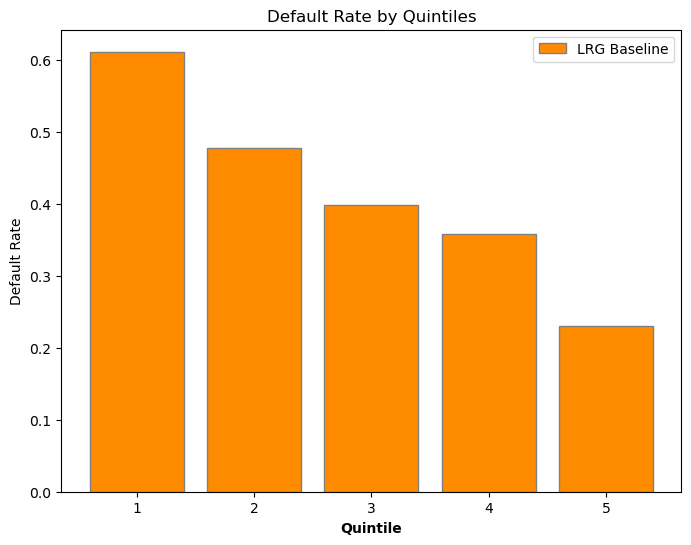

In [51]:
default_rate_by_quintile(pipeline, X_test, y_test, "LRG Baseline")

In [52]:
metrics_df = calculate_metrics(pipeline, X_test, y_test)
metrics_df

,Metric,Score
0,Average Precision Score,0.714335
1,Recall,0.754764
2,F1 Score,0.701772
3,AUC,0.651485
4,Brier Score,0.226865
